# 作業目標:

    通過建立多層的神經網路, 了解權值矩陣更新

# 作業重點: 

3  層神經網路

通過增加更多的中間層，以對更多關係的組合進行建模

syn1 權值矩陣將隱層的組合輸出映射到最終結果，

而在更新 syn1 的同時，還需要更新 syn0 權值矩陣，

以從輸入資料中更好地產生這些組合

In [45]:
import numpy as np
 
# Sigmoid 函數可以將任何值都映射到一個位於 0 到  1 範圍內的值。通過它，我們可以將實數轉化為概率值
def nonlin(x,deriv=False):
    if(deriv==True):
        return x*(1-x)
    return 1/(1+np.exp(-x))

X = np.array([  [0,0,1],
                [0,1,1],
                [1,0,1],
                [1,1,1] ])  
        
# define y for output dataset            
y = np.array([[0, 0, 1, 1]]).T

In [58]:
# seed random numbers to make calculation
# deterministic (just a good practice)
np.random.seed(1)
#亂數設定產生種子得到的權重初始化集仍是隨機分佈的，
#但每次開始訓練時，得到的權重初始集分佈都是完全一致的。
 
# initialize weights randomly with mean 0
syn0 = 2*np.random.random((3,2)) - 1
syn1 = 2*np.random.random((2,1)) - 1

神經網路訓練
for 迴圈反覆運算式地多次執行訓練代碼，使得我們的網路能更好地擬合訓練集

In [59]:
l2_error = y
i = 0
SSD = []
while sum(l2_error**2) > 0.01:
    
    print("iter=", i)
    i += 1
    
    # Forward Propagation
    l0 = X
    l1 = nonlin(np.dot(l0,syn0)) # l0(4,3)經過一個權重syn0(3,2)和一個sigmoid -> l1(4,2)
    l2 = nonlin(np.dot(l1,syn1)) # l1(4,2)經過一個權重syn1(2,1)和一個sigmoid -> l2(4,1)
 
    # Backward Propagation   
    l2_error = y - l2 # 自訂dL/dy
    l2_delta = l2_error * nonlin(l2, True) # 經過一個反向sigmoid -> dL/dy * y(1-y)
    
    l1_error = l2_delta.dot(syn1.T) # 經過一個反向sigmoid、一個反向權重 -> [dL/dy * y(1-y)] dot (syn1.T)
    l1_delta = l1_error * nonlin(l1, True) # 經過一個反向sigmoid、一個反向權重、再一個反向sigmoid -> [dL/dy * y(1-y)] dot (syn1.T) * l1(l1-1)
    
    # update weights
    syn0 += np.dot(l0.T, l1_delta)
    syn1 += np.dot(l1.T, l2_delta)
    
    # check the result
    SSD.append(sum(l2_error**2)[0])
    print("Sum of Square Differences = ", sum(l2_error**2), '\n')
    
print("Output After Training:")
print(l2)

iter= 0
Sum of Square Differences =  [1.02096612] 

iter= 1
Sum of Square Differences =  [1.01502535] 

iter= 2
Sum of Square Differences =  [1.00989693] 

iter= 3
Sum of Square Differences =  [1.005403] 

iter= 4
Sum of Square Differences =  [1.00140296] 

iter= 5
Sum of Square Differences =  [0.99778429] 

iter= 6
Sum of Square Differences =  [0.99445576] 

iter= 7
Sum of Square Differences =  [0.99134236] 

iter= 8
Sum of Square Differences =  [0.98838144] 

iter= 9
Sum of Square Differences =  [0.98551982] 

iter= 10
Sum of Square Differences =  [0.98271145] 

iter= 11
Sum of Square Differences =  [0.97991573] 

iter= 12
Sum of Square Differences =  [0.97709606] 

iter= 13
Sum of Square Differences =  [0.97421875] 

iter= 14
Sum of Square Differences =  [0.97125208] 

iter= 15
Sum of Square Differences =  [0.96816555] 

iter= 16
Sum of Square Differences =  [0.96492923] 

iter= 17
Sum of Square Differences =  [0.96151318] 

iter= 18
Sum of Square Differences =  [0.95788703] 

iter=

iter= 228
Sum of Square Differences =  [0.01094301] 

iter= 229
Sum of Square Differences =  [0.01086645] 

iter= 230
Sum of Square Differences =  [0.01079088] 

iter= 231
Sum of Square Differences =  [0.01071629] 

iter= 232
Sum of Square Differences =  [0.01064264] 

iter= 233
Sum of Square Differences =  [0.01056994] 

iter= 234
Sum of Square Differences =  [0.01049815] 

iter= 235
Sum of Square Differences =  [0.01042727] 

iter= 236
Sum of Square Differences =  [0.01035727] 

iter= 237
Sum of Square Differences =  [0.01028814] 

iter= 238
Sum of Square Differences =  [0.01021986] 

iter= 239
Sum of Square Differences =  [0.01015243] 

iter= 240
Sum of Square Differences =  [0.01008581] 

iter= 241
Sum of Square Differences =  [0.01002001] 

iter= 242
Sum of Square Differences =  [0.00995501] 

Output After Training:
[[0.05438269]
 [0.0449844 ]
 [0.95336444]
 [0.9470939 ]]


Text(0,0.5,'Sum of Square Differences')

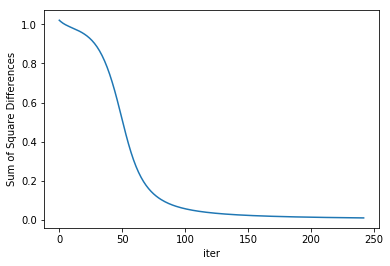

In [60]:
import matplotlib.pyplot as plt
plt.plot(list(range(len(SSD))), SSD)
plt.xlabel("iter")
plt.ylabel("Sum of Square Differences")